<a href="https://colab.research.google.com/github/moath177/Mall-Customer/blob/main/Mall_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
#!/bin/bash
!kaggle datasets download vjchoudhary7/customer-segmentation-tutorial-in-python


Dataset URL: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
License(s): other
  0% 0.00/1.55k [00:00<?, ?B/s]
100% 1.55k/1.55k [00:00<00:00, 3.03MB/s]


In [ ]:
!unzip customer-segmentation-tutorial-in-python.zip

In [ ]:
df = pd.read_csv('/content/customer-segmentation-tutorial-in-python.zip')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.isna().sum()

,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0
Cluster,0


In [ ]:
df.duplicated().sum()


0

In [ ]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,200.000000,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000,1.400000
std,13.969007,26.264721,25.823522,1.449311
min,18.000000,15.000000,1.000000,0.000000
25%,28.750000,41.500000,34.750000,0.000000
50%,36.000000,61.500000,50.000000,1.000000
75%,49.000000,78.000000,73.000000,3.000000
max,70.000000,137.000000,99.000000,4.000000


In [ ]:
#this column is not important
df = df.drop(['CustomerID'], axis=1)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
# Ffeature swlwction and scaling
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Determine optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


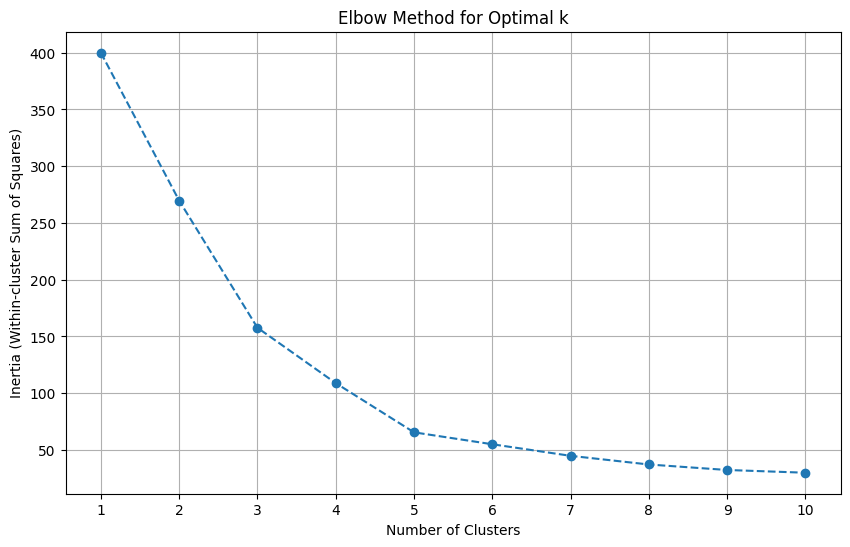

In [ ]:
# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [ ]:
optimal_k = 5

# Train K-means model
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(X_scaled)
clusters = kmeans.predict(X_scaled)

# Add cluster labels to the dataframe
df['Cluster'] = clusters
df.head(20)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,4
1,Male,21,15,81,2
2,Female,20,16,6,4
3,Female,23,16,77,2
4,Female,31,17,40,4
5,Female,22,17,76,2
6,Female,35,18,6,4
7,Female,23,18,94,2
8,Male,64,19,3,4
9,Female,30,19,72,2


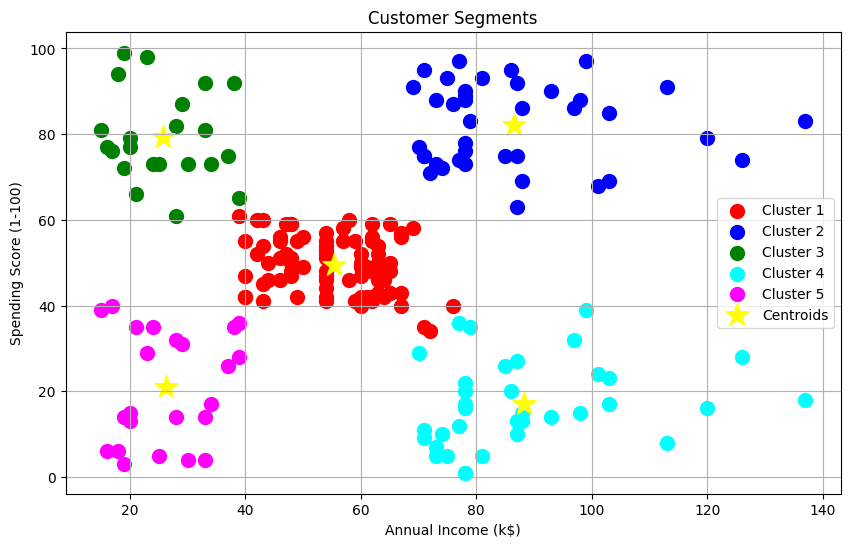

In [ ]:
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']

for i in range(optimal_k):
    plt.scatter(df[df['Cluster'] == i]['Annual Income (k$)'],
                df[df['Cluster'] == i]['Spending Score (1-100)'],
                s=100, c=colors[i],
                label=f'Cluster {i+1}')

plt.scatter(kmeans.cluster_centers_[:, 0]*scaler.scale_[0] + scaler.mean_[0],
            kmeans.cluster_centers_[:, 1]*scaler.scale_[1] + scaler.mean_[1],
            s=300, c='yellow', marker='*', label='Centroids')

plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
cluster_profiles = df.groupby('Cluster').agg({
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'Age': 'mean',
    'Gender': lambda x: x.mode()[0]
}).reset_index()

cluster_profiles.columns = ['Cluster', 'Avg_Income', 'Avg_Spending', 'Avg_Age', 'Gender']
cluster_profiles

,Cluster,Avg_Income,Avg_Spending,Avg_Age,Gender
0,0,55.296296,49.518519,42.716049,Female
1,1,86.538462,82.128205,32.692308,Female
2,2,25.727273,79.363636,25.272727,Female
3,3,88.200000,17.114286,41.114286,Male
4,4,26.304348,20.913043,45.217391,Female
